In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv(r"C:\Users\minha\Downloads\archive\Data\features_30_sec.csv")

In [3]:
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [4]:
X = df.drop(columns=['label', 'filename'])  
y = df['label']  

In [5]:
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = model.predict(X_test)

In [9]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 75.50%


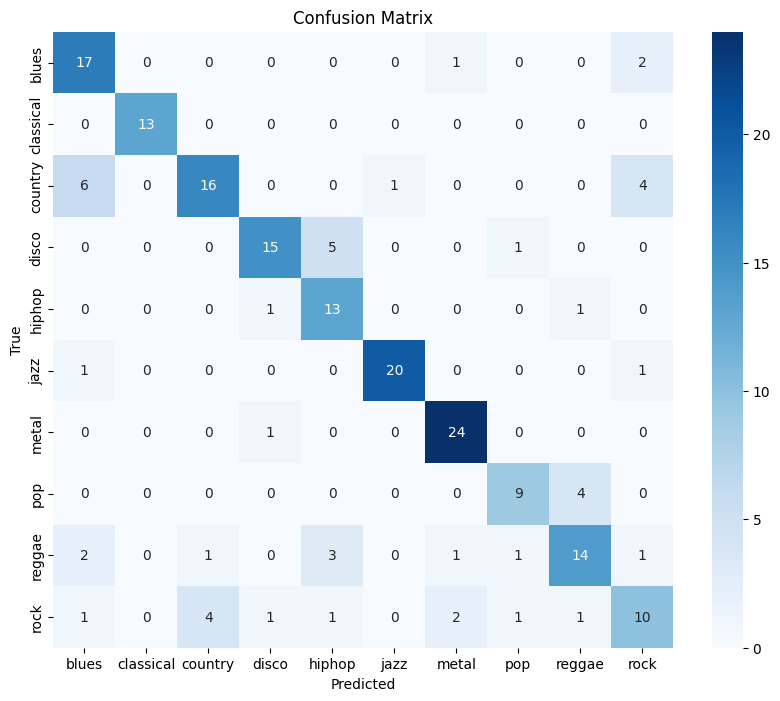

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [11]:
img_dir = r"C:\Users\minha\Downloads\archive\Data\images_original"

In [12]:
img_height, img_width = 128, 128
batch_size = 32

In [13]:
# Data augmentation & preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    img_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    img_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 800 images belonging to 10 classes.
Found 199 images belonging to 10 classes.


In [14]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

C:\Users\minha\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train model
history = model.fit(
    train_data,
    epochs=15,
    validation_data=val_data
)

C:\Users\minha\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.1225 - loss: 2.3121 - val_accuracy: 0.2261 - val_loss: 2.2684
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.1538 - loss: 2.2582 - val_accuracy: 0.2714 - val_loss: 2.2100
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 995ms/step - accuracy: 0.2237 - loss: 2.1961 - val_accuracy: 0.2814 - val_loss: 2.1347
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 979ms/step - accuracy: 0.2250 - loss: 2.1307 - val_accuracy: 0.2513 - val_loss: 2.0819
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 957ms/step - accuracy: 0.2150 - loss: 2.1138 - val_accuracy: 0.2965 - val_loss: 2.0254
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 972ms/step - accuracy: 0.2700 - loss: 2.0296 - val_accuracy: 0.2513 - val_loss: 1.9737
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.2862 - loss: 1.9838 - val_accuracy: 0.3618 - val_loss: 1.9266
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 975ms/step - accuracy: 0.3050 - loss: 1.9692 - val_accuracy: 0.3

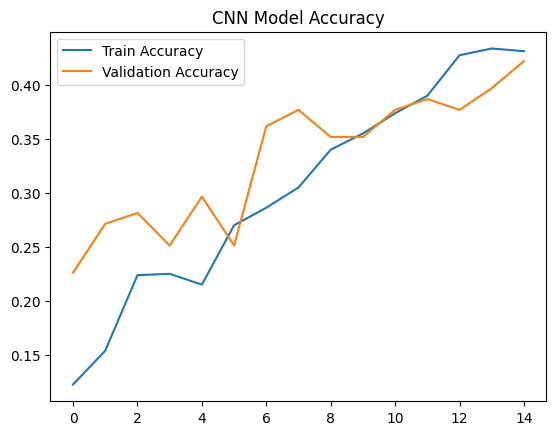

In [17]:
# Plot accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("CNN Model Accuracy")
plt.show()

In [18]:
model.save('music_genre_cnn.h5')

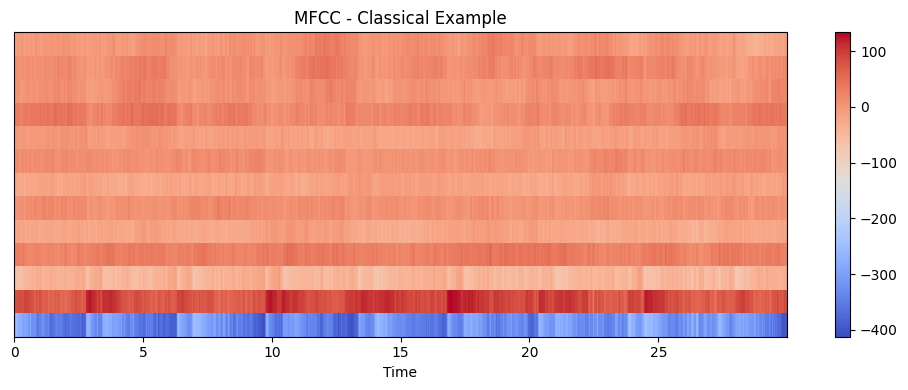

In [19]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

audio_path = r"C:\Users\minha\Downloads\archive\Data\genres_original\classical\classical.00090.wav"

y, sr = librosa.load(audio_path, duration=30)

mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title("MFCC - Classical Example")
plt.tight_layout()
plt.show()

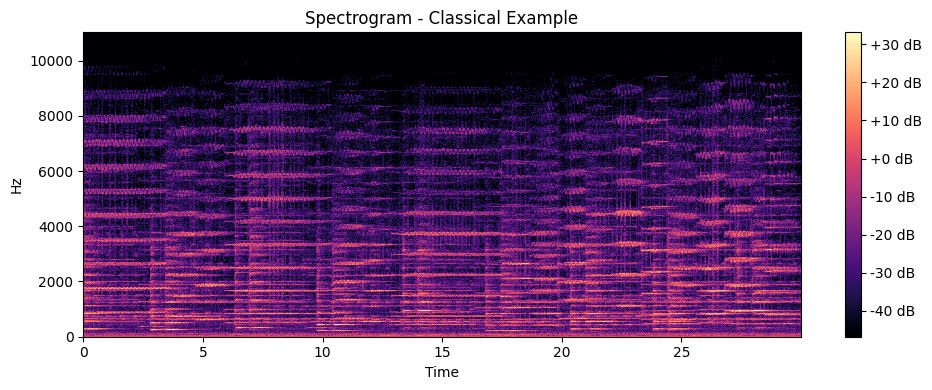

In [20]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

audio_path = r"C:\Users\minha\Downloads\archive\Data\genres_original\classical\classical.00090.wav"

y, sr = librosa.load(audio_path, duration=30)

plt.figure(figsize=(10, 4))
S = librosa.stft(y)  # Short-time Fourier transform
S_db = librosa.amplitude_to_db(abs(S))  # Convert to decibels
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram - Classical Example")
plt.tight_layout()
plt.show()